<a href="https://colab.research.google.com/github/jullysilva/TES_ATVS/blob/main/GitHub_Repo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from plotnine import *
plt.style.use('default')

In [29]:
git_df = pd.read_csv("/content/sample_data/TopStaredRepositories (1).csv", parse_dates=['Last Update Date'], dayfirst=True)
git_df.head()

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24 15:56:17+00:00,JavaScript,290k,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24 15:40:21+00:00,JavaScript,112k,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap
2,EbookFoundation,free-programming-books,Freely available programming books,2017-06-23 01:09:34+00:00,NaN,87.8k,"education,list,books,resource",https://github.com/EbookFoundation/free-progra...
3,facebook,react,"A declarative, efficient, and flexible JavaScr...",2017-06-24 19:33:49+00:00,JavaScript,69.7k,NaN,https://github.com/facebook/react
4,d3,d3,"Bring data to life with SVG, Canvas and HTML.",2017-05-31 06:03:47+00:00,JavaScript,65.7k,visualization,https://github.com/d3/d3


In [6]:
git_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Username          980 non-null    object             
 1   Repository Name   980 non-null    object             
 2   Description       977 non-null    object             
 3   Last Update Date  980 non-null    datetime64[ns, UTC]
 4   Language          877 non-null    object             
 5   Number of Stars   980 non-null    object             
 6   Tags              489 non-null    object             
 7   Url               980 non-null    object             
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 61.4+ KB


In [ ]:
# 1. Repositórios populares
#Determinar o que constitui um repositório popular extraindo o intervalo de repositórios marcados com estrela máxima e mínima
#Convertendo o formato alfanumérico de "Número de estrelas" para numérico

In [31]:
git_df_max = git_df['Number of Stars'].str.contains('k').all()
git_df_max

True

In [32]:
git_df['Number of Stars']=git_df['Number of Stars'].str.replace('k','').astype(float)


In [9]:
# Os 5 principais repositórios do conjunto de dados [com base no "Número de estrelas"]
git_df.head()


,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24 15:56:17+00:00,JavaScript,290.0,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24 15:40:21+00:00,JavaScript,112.0,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap
2,EbookFoundation,free-programming-books,Freely available programming books,2017-06-23 01:09:34+00:00,NaN,87.8,"education,list,books,resource",https://github.com/EbookFoundation/free-progra...
3,facebook,react,"A declarative, efficient, and flexible JavaScr...",2017-06-24 19:33:49+00:00,JavaScript,69.7,NaN,https://github.com/facebook/react
4,d3,d3,"Bring data to life with SVG, Canvas and HTML.",2017-05-31 06:03:47+00:00,JavaScript,65.7,visualization,https://github.com/d3/d3


In [ ]:
#Os 5 últimos repositórios do conjunto de dados

In [ ]:
git_df.tail()


,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
975,chrisjenx,Calligraphy,Custom fonts in Android the easy way...,2017-06-06 19:23:22+00:00,Java,6.4,NaN,https://github.com/chrisjenx/Calligraphy
976,eliangcs,http-prompt,HTTPie + prompt_toolkit = an interactive comma...,2017-05-11 13:27:42+00:00,Python,6.4,"python,syntax-highlighting,shell,cli,http,auto...",https://github.com/eliangcs/http-prompt
977,robertdavidgraham,masscan,"TCP port scanner, spews SYN packets asynchrono...",2017-06-22 06:27:09+00:00,C,6.4,NaN,https://github.com/robertdavidgraham/masscan
978,ElemeFE,mint-ui,Mobile UI elements for Vue.js,2017-06-22 10:02:35+00:00,Vue,6.4,"vue,mobile,component,vue-components,ui-kit",https://github.com/ElemeFE/mint-ui
979,lhc70000,iina,The modern video player for macOS.,2017-06-24 19:09:31+00:00,Swift,6.4,"macos,video,mpv,swift,video-player",https://github.com/lhc70000/iina


In [ ]:
#Análise estatística dos repositórios, parecido com o boxplot

In [33]:
#git_df['Number of Stars'].describe()

def convert_to_number(value):
    if isinstance(value, str):  # Adicione esta linha
        if 'k' in value:
            return float(value.replace('k', '')) * 1000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1000000
    return value  # Retorna o valor original se não for uma string





In [34]:
git_df['Number of Stars'] = git_df['Number of Stars'].apply(convert_to_number)


In [35]:
print(git_df['Number of Stars'].describe())


count    980.000000
mean      12.985714
std       12.780092
min        6.400000
25%        7.700000
50%        9.500000
75%       14.200000
max      290.000000
Name: Number of Stars, dtype: float64


In [ ]:
# Lista de todos os repositórios com estrelas > 13.000

In [24]:
popular_repos= git_df[git_df['Number of Stars'] > 13.0]
len(popular_repos)

288

In [ ]:
popular_repos.head(10)


,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24 15:56:17+00:00,JavaScript,290.0,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24 15:40:21+00:00,JavaScript,112.0,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap
2,EbookFoundation,free-programming-books,Freely available programming books,2017-06-23 01:09:34+00:00,NaN,87.8,"education,list,books,resource",https://github.com/EbookFoundation/free-progra...
3,facebook,react,"A declarative, efficient, and flexible JavaScr...",2017-06-24 19:33:49+00:00,JavaScript,69.7,NaN,https://github.com/facebook/react
4,d3,d3,"Bring data to life with SVG, Canvas and HTML.",2017-05-31 06:03:47+00:00,JavaScript,65.7,visualization,https://github.com/d3/d3
5,getify,You-Dont-Know-JS,A book series on JavaScript. @YDKJS on twitter.,2017-06-23 10:42:36+00:00,JavaScript,62.0,"book-series,javascript,training-materials,asyn...",https://github.com/getify/You-Dont-Know-JS
6,tensorflow,tensorflow,Computation using data flow graphs for scalabl...,2017-06-24 18:25:42+00:00,C++,61.6,"tensorflow,python,machine-learning,deep-neural...",https://github.com/tensorflow/tensorflow
7,sindresorhus,awesome,Curated list of awesome lists,2017-06-24 17:26:02+00:00,NaN,60.7,"lists,awesome,unicorns,resources,awesome-list",https://github.com/sindresorhus/awesome
8,vuejs,vue,"A progressive, incrementally-adoptable JavaScr...",2017-06-24 15:38:55+00:00,JavaScript,57.7,"javascript,vue,framework,frontend",https://github.com/vuejs/vue
9,angular,angular.js,AngularJS - HTML enhanced for web apps!,2017-06-24 06:25:23+00:00,JavaScript,56.2,NaN,https://github.com/angular/angular.js


In [ ]:
popular_repos.tail(8)


,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
280,jondot,awesome-react-native,"Awesome React Native components, news, tools, ...",2017-06-23 05:34:47+00:00,Ruby,13.3,"react,mobile,react-native,awesome-list",https://github.com/jondot/awesome-react-native
281,apache,spark,Mirror of Apache Spark,2017-06-24 17:07:10+00:00,Scala,13.3,NaN,https://github.com/apache/spark
282,Thibaut,devdocs,API Documentation Browser,2017-06-18 23:41:29+00:00,Ruby,13.3,"devdocs,offline,app,documentation,docs,pwa,api...",https://github.com/Thibaut/devdocs
283,chjj,marked,A markdown parser and compiler. Built for speed.,2017-06-12 01:27:25+00:00,HTML,13.2,NaN,https://github.com/chjj/marked
284,knsv,mermaid,Generation of diagram and flowchart from text ...,2017-06-04 07:26:58+00:00,JavaScript,13.2,NaN,https://github.com/knsv/mermaid
285,juliangarnier,anime,JavaScript Animation Engine,2017-06-24 15:44:51+00:00,JavaScript,13.1,"anime,animation",https://github.com/juliangarnier/anime
286,designmodo,Flat-UI,Flat UI Free - Design Framework (html/css3/les...,2017-02-21 20:29:33+00:00,CSS,13.1,NaN,https://github.com/designmodo/Flat-UI
287,julianshapiro,velocity,Accelerated JavaScript animation.,2017-05-12 13:58:42+00:00,JavaScript,13.1,NaN,https://github.com/julianshapiro/velocity


In [ ]:
# Classificando repositórios de acordo com a popularidade
classified_repos=[]
for i in range(8,300,7):
    x = git_df[(git_df['Number of Stars'] >= i) & (git_df['Number of Stars'] <(i+7.0))]
    classified_repos.append(len(x))

In [ ]:
indexes = []

for i in range (8000,300000, 7000):
    x = '[' + str(i) +','+ (str(i+7000)) + ')'
    indexes.append(x)

<Axes: >

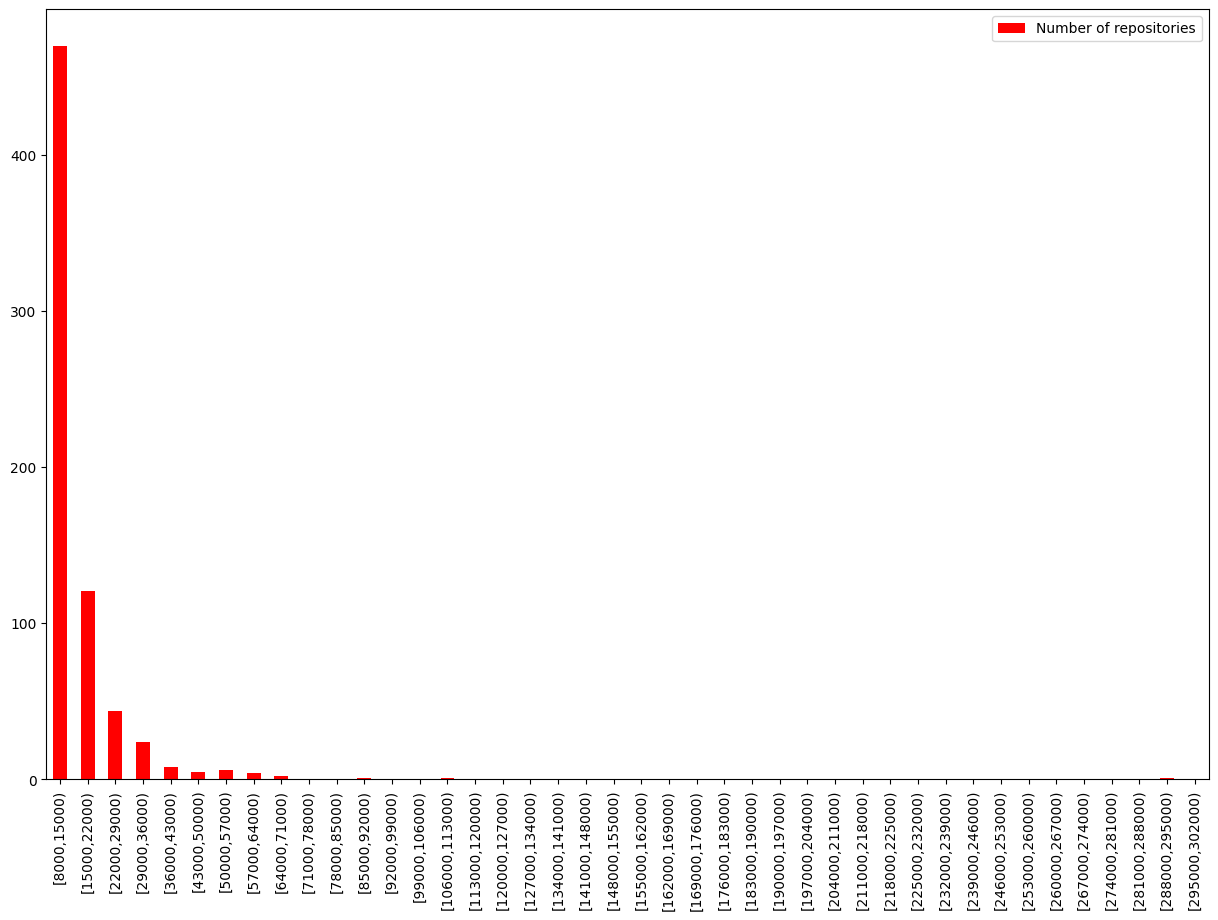

In [ ]:
divided_repos = pd.Series(data=classified_repos, index=indexes)
divided_repos.plot(kind='bar', figsize=(15,10), color=['red'],legend=True, label='Number of repositories')

In [ ]:
#LP Populares
# Determinar a popularidade de uma linguagem com base no número de repositórios que a utilizam.

In [ ]:
x=git_df['Language'].value_counts()
x.head()
#p = ggplot(aes(x='index',y='count'), data =x) + geom_point(color='coral') + geom_line(color='red')
#print(p)

JavaScript     338
Java            67
Python          63
Ruby            44
Objective-C     43
Name: Language, dtype: int64

<Axes: title={'center': 'No of repositories vs language used'}>

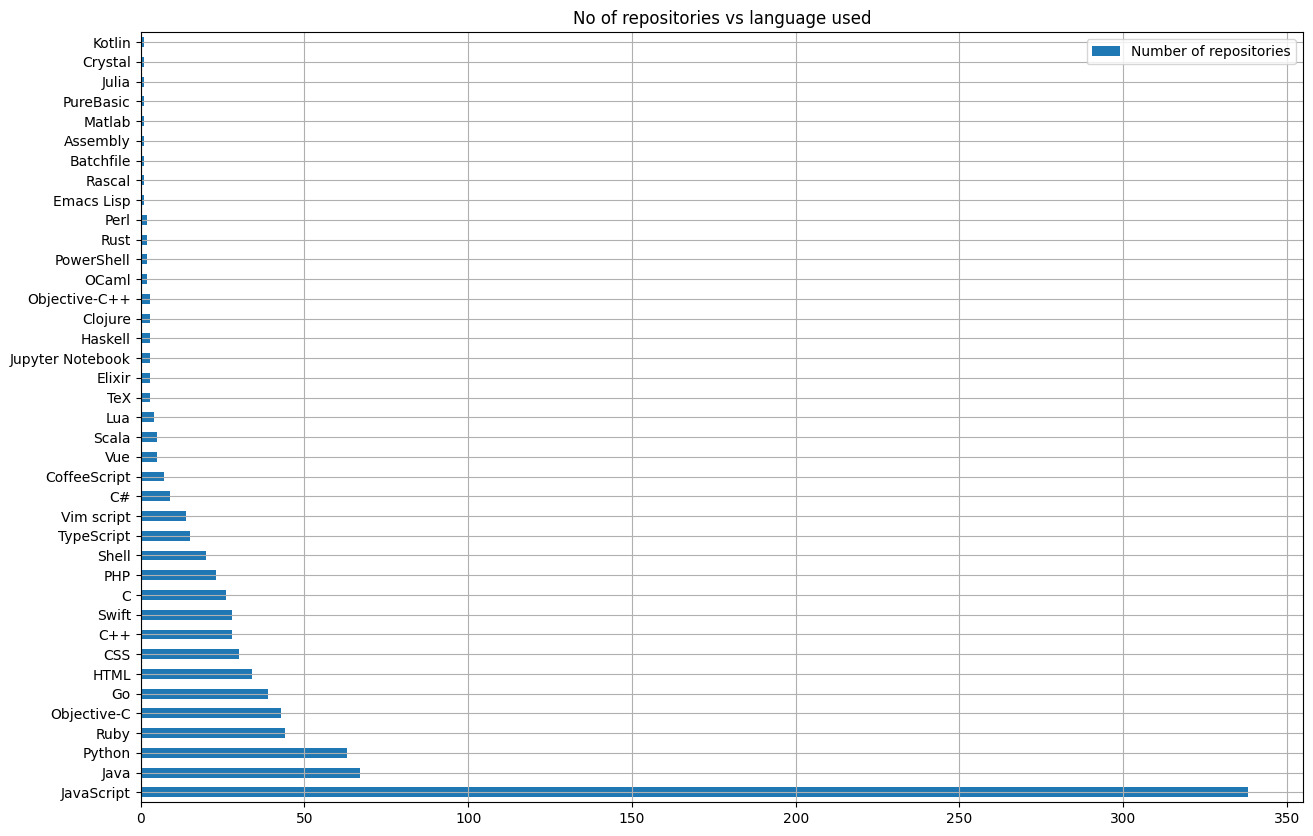

In [ ]:
%matplotlib inline
plt.figure()
x.plot(kind='barh',figsize=(15,10),grid=True, label='Number of repositories',legend='No of repos',title='No of repositories vs language used')

<Axes: ylabel='Division of the top 5 languages'>

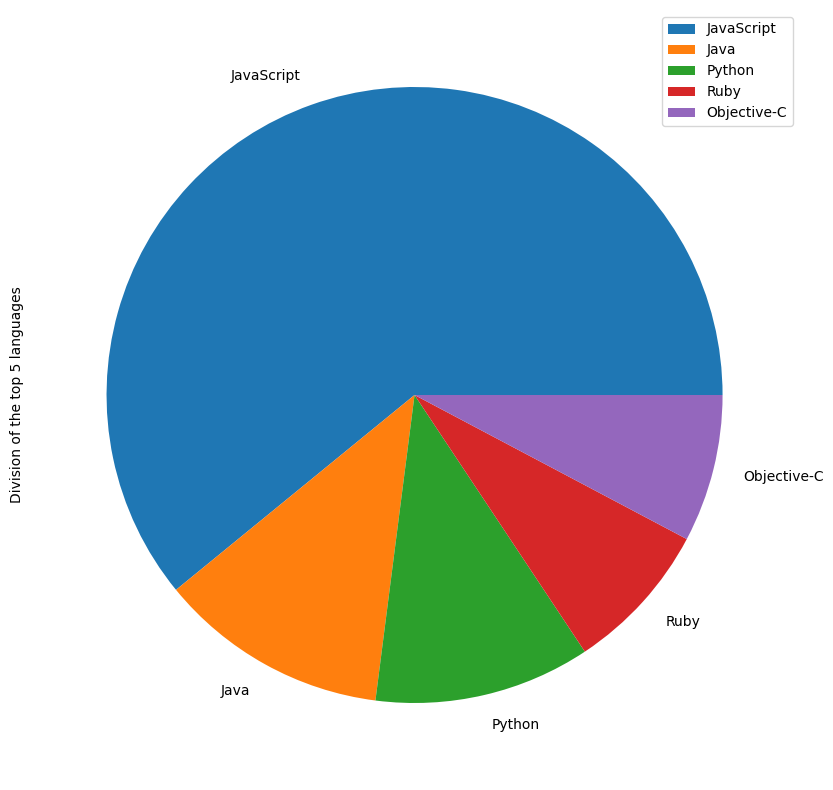

In [ ]:
%matplotlib inline
x[:5].plot.pie(label="Division of the top 5 languages",fontsize=10,figsize=(10,10),legend=True)

<Axes: ylabel='Division of the top 20 languages'>

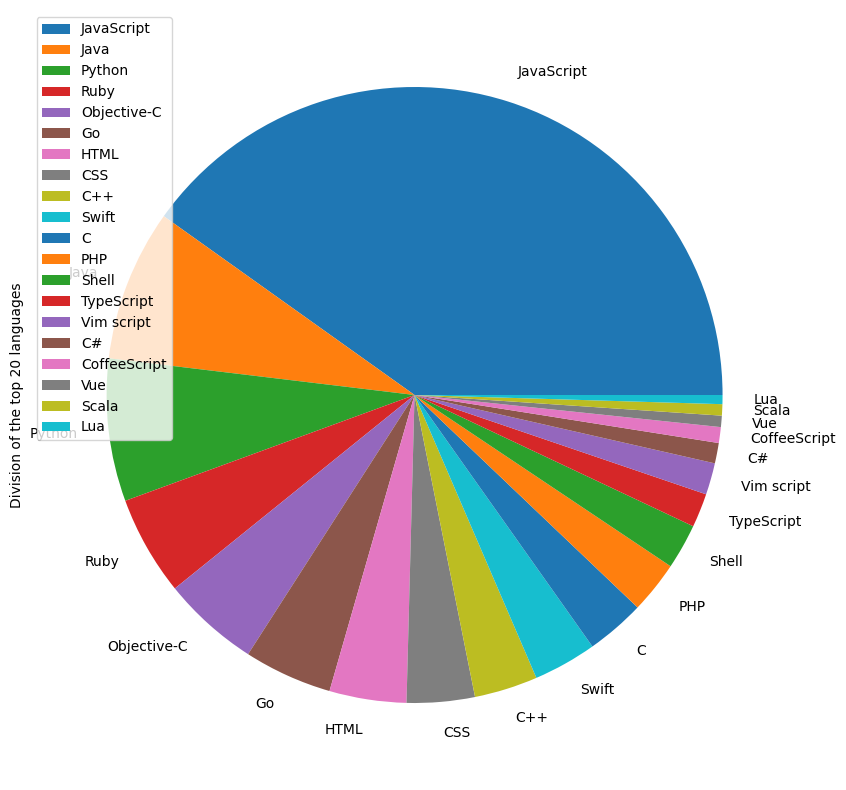

In [ ]:
%matplotlib inline
x[:20].plot.pie(label="Division of the top 20 languages",fontsize=10,figsize=(10,10),legend=True)

In [ ]:
# Domínios Populares
# Determinando os domínios populares e analisando as tags doS repositórios
#Remove todos os campos de tags nulas do dataframe

In [ ]:
#git_df['Number of Stars']=git_df['Number of Stars'].str.replace('k','').astype(float)
nonull_df = git_df[['Tags','Number of Stars']].dropna()
tags_list = nonull_df['Tags'].str.split(',')

In [ ]:
tags_list.head()


0    [nonprofits, certification, curriculum, react,...
1    [javascript, css, html, bootstrap, jekyll-site...
2                   [education, list, books, resource]
4                                      [visualization]
5    [book-series, javascript, training-materials, ...
Name: Tags, dtype: object

(-0.5, 799.5, 399.5, -0.5)

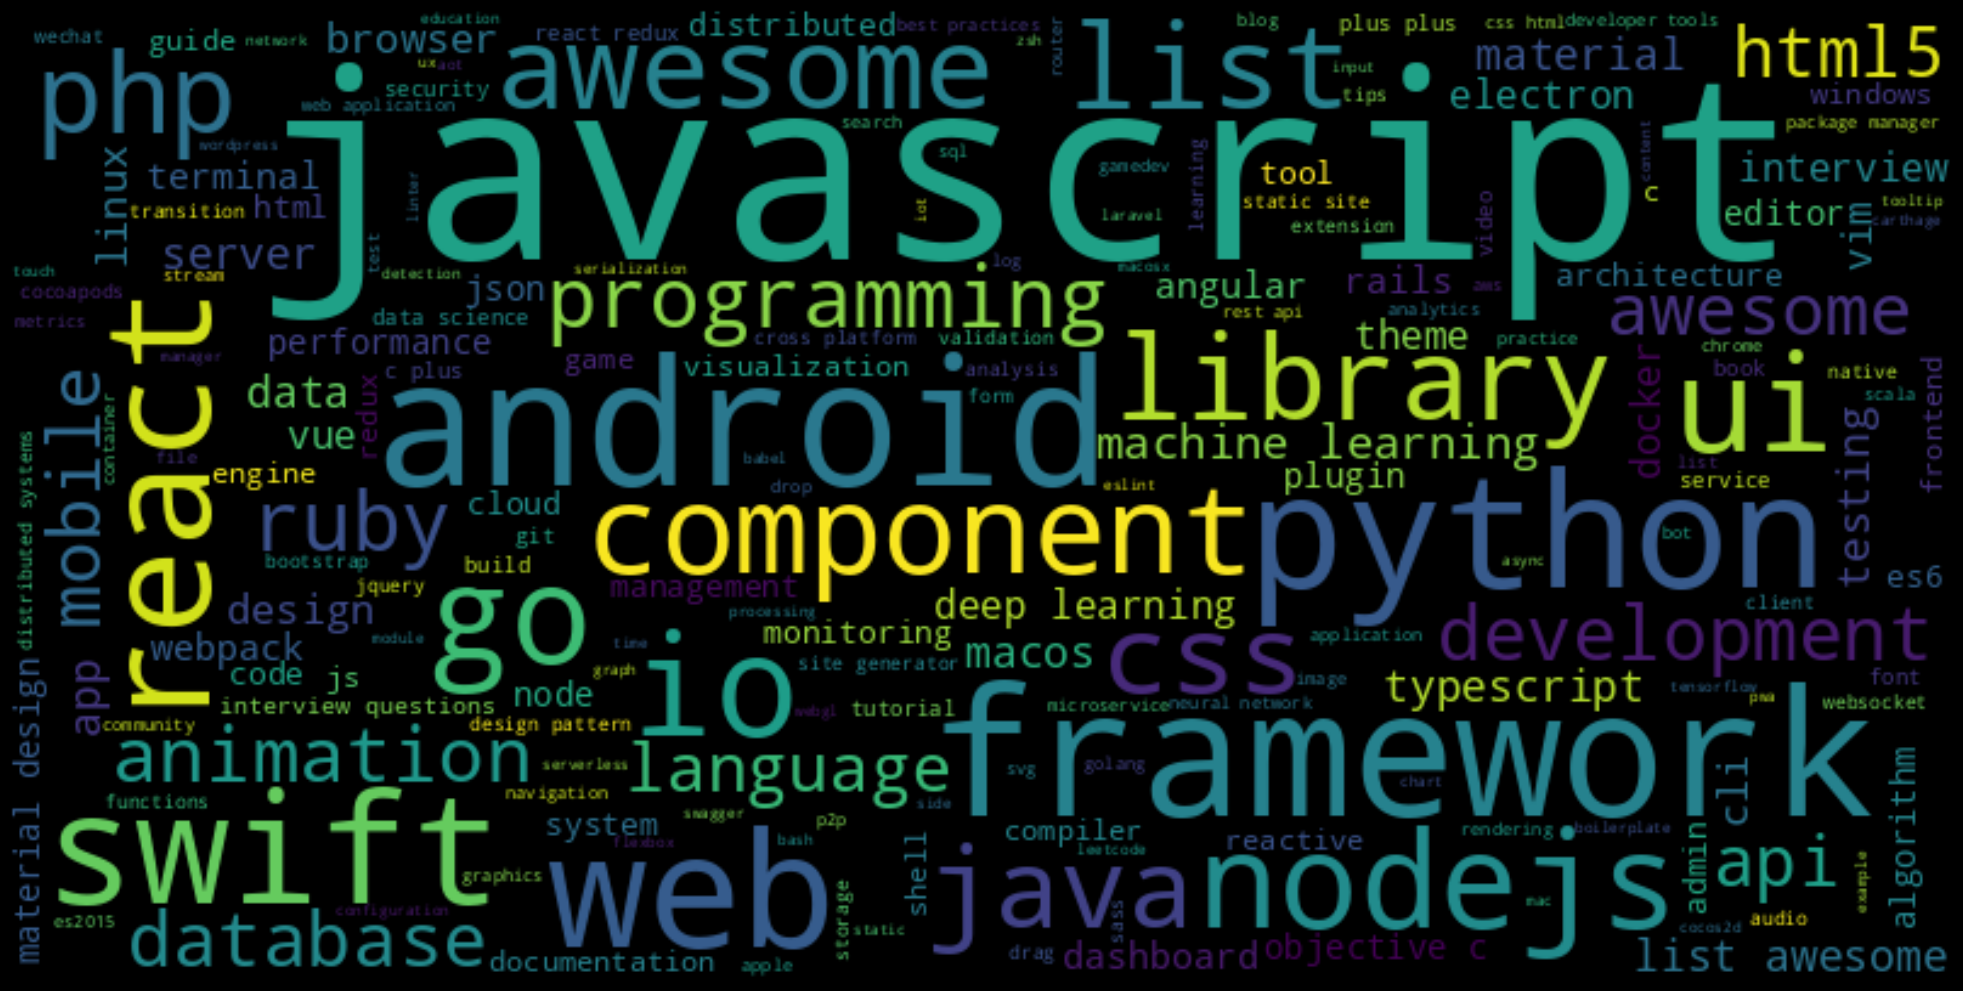

In [ ]:
initial = nonull_df['Tags'].str.split(',')
a = []
for item in initial:
       a = a+item
wc_text = ' '.join(a)

%matplotlib inline
wordcloud = WordCloud(background_color='black',width=800, height=400).generate(wc_text)
plt.figure(figsize=(25,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")

In [ ]:
web_dev_count = 0
tags = ['javascript', 'css', 'html', 'nodejs', 'bootstrap','react', 'react-native', 'rest-api', 'rest', 'web-development','typescript','coffeescript']
for item in tags_list:
    if set(tags).intersection(item):
        web_dev_count+=1
web_dev_count

171

In [ ]:
machine_data_count=0
mach=[]
tags=['machine-learning', 'jupyter','jupter-notebook', 'tensorflow','data-science','data-analytics']
for item in tags_list:
    if set(tags).intersection(item):
        machine_data_count+=1
        mach.append(item)
machine_data_count

16

In [ ]:
mobile_dev_count=0
tags=['android','sdk','ios','swift','mobile','react','macos','windows']
for item in tags_list:
    if set(tags).intersection(item):
        mobile_dev_count+=1
mobile_dev_count

99

In [ ]:
linux_dev_count=0
linux=[]
tags=['linux','unix','bash','shell','cli','bsd']
for item in tags_list:
    if set(tags).intersection(item):
        linux_dev_count+=1
        linux.append(item)
linux_dev_count

27

In [ ]:
hardware_dev_count=0
hardware=[]
tags=['hardware','iot','smart','system','system-architecture','cloud']
for item in tags_list:
    if set(tags).intersection(item):
        hardware.append(item)
        hardware_dev_count+=1
hardware_dev_count

8

In [ ]:
domain_series=pd.Series(index=['Web Development','Data Science and Machine Learning','Mobile Development','Linux and Shell Programming','System hardware and IOT'],
                        data=[web_dev_count,machine_data_count,mobile_dev_count,linux_dev_count,hardware_dev_count])

In [ ]:
domain_series


Web Development                      171
Data Science and Machine Learning     16
Mobile Development                    99
Linux and Shell Programming           27
System hardware and IOT                8
dtype: int64

[Text(0.5, 0, 'Number of repositories'), Text(0, 0.5, 'Domain Name')]

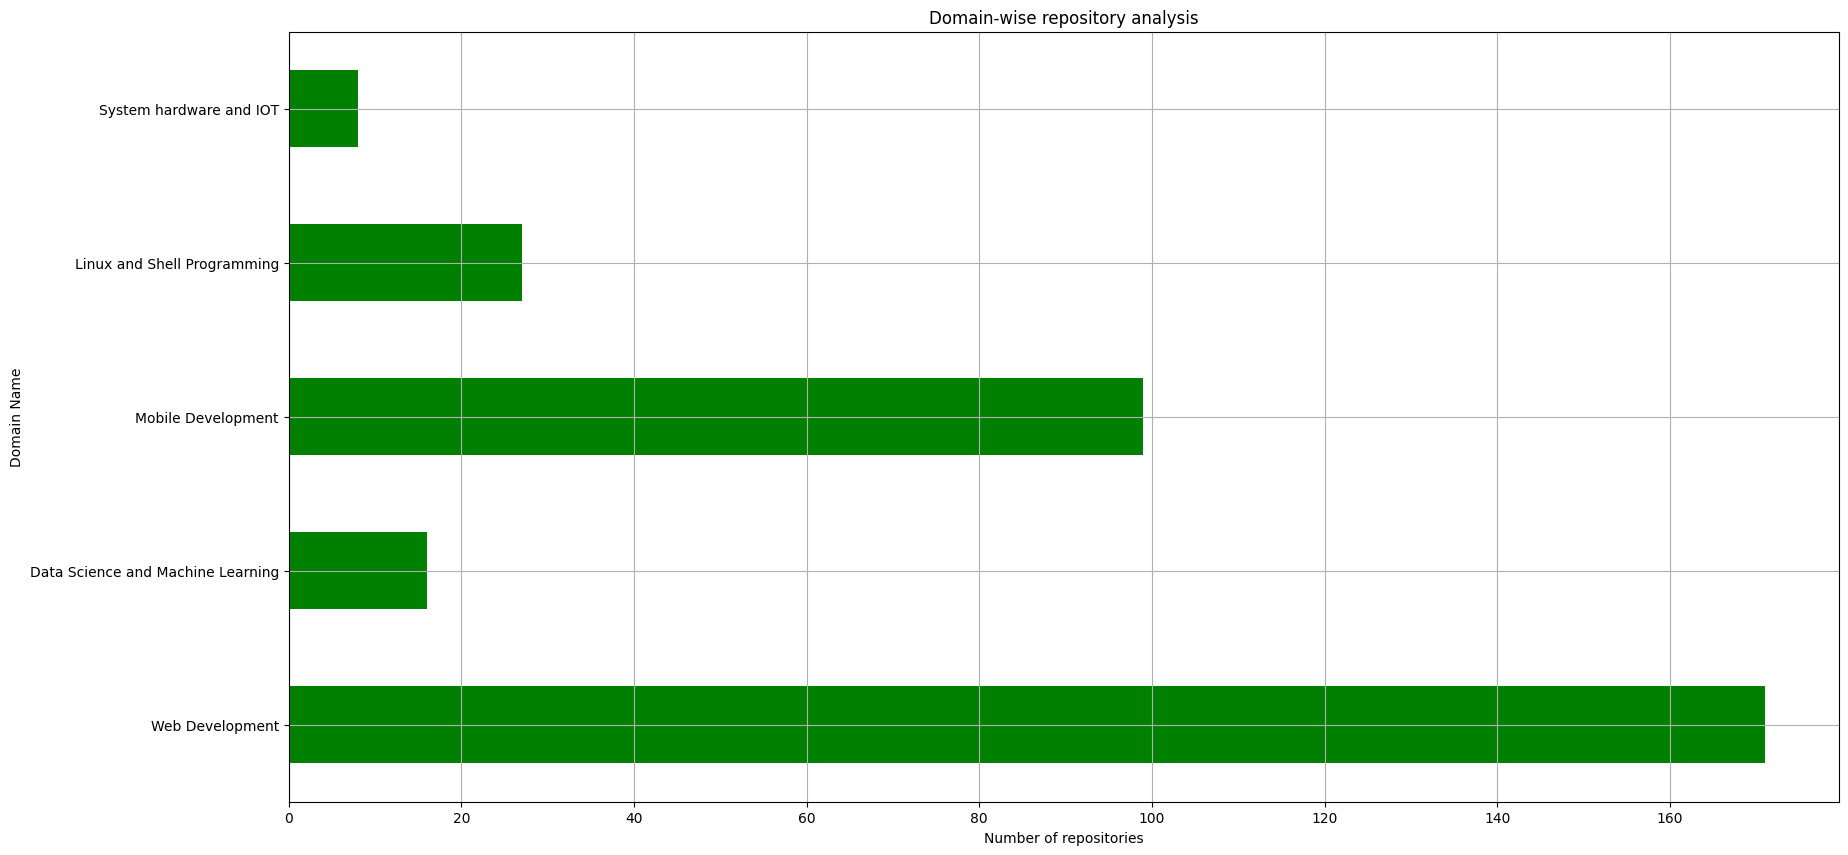

In [ ]:
%matplotlib inline
fig_domain=domain_series.plot(lw=2,kind='barh',figsize=(20,10),color=['green'],grid=True,title='Domain-wise repository analysis',
                              )
fig_domain.set(xlabel="Number of repositories", ylabel="Domain Name")

In [ ]:
#Determina a correlação entre o número de tags e o número de estrelas

In [ ]:
nonull_df['CountTag']=0
for i in range(0,489,1):
    nonull_df['CountTag'].iloc[i] = len(list(nonull_df['Tags'].iloc[i].split(',')))

<ipython-input-39-5db447b0ba21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
nonull_df['CountTag'].corr(nonull_df['Number of Stars'])


0.046468672349122275

**Conclusão**

*Inferências da análise*

O repositório mais popular no GitHub é o freeCodeCamp, com 290.000 estrelas

* Nos 8 principais repositórios do conjunto de dados, 3 são instrucionais e educacionais.
* JavaScript é a linguagem mais usada e constitui 38,5% do total de linguagens nesses repositórios
* Frameworks são o tipo de projeto mais popular no GitHub
* Em domínios, Desenvolvimento Web é o domínio de trabalho mais popular, seguido pelo desenvolvimento Mobile (Android, iOS, macOS, Windows)
* Não há correlação determinável entre o número de tags e o número de estrelas.
* O coeficiente de correlação é fraco 0,04646

# **Atividade 01/09/2023 - Primeiro Insight**

In [25]:
# Criar listas para armazenar os nomes dos repositórios e a contagem de palavras
word_counts = []

for index, repo in popular_repos.iterrows():
    description = repo["Description"]
    if len(description) != 0:
        word_count = len(str(description).split())
    else:
        word_count = 0
    word_counts.append(word_count)

popular_repos["Contagem de Palavras"] = word_counts

popular_repos.head(8)


<ipython-input-25-23aea8c5d988>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url,Contagem de Palavras
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24 15:56:17+00:00,JavaScript,290.0,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp,13
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24 15:40:21+00:00,JavaScript,112.0,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap,17
2,EbookFoundation,free-programming-books,Freely available programming books,2017-06-23 01:09:34+00:00,NaN,87.8,"education,list,books,resource",https://github.com/EbookFoundation/free-progra...,4
3,facebook,react,"A declarative, efficient, and flexible JavaScr...",2017-06-24 19:33:49+00:00,JavaScript,69.7,NaN,https://github.com/facebook/react,11
4,d3,d3,"Bring data to life with SVG, Canvas and HTML.",2017-05-31 06:03:47+00:00,JavaScript,65.7,visualization,https://github.com/d3/d3,9
5,getify,You-Dont-Know-JS,A book series on JavaScript. @YDKJS on twitter.,2017-06-23 10:42:36+00:00,JavaScript,62.0,"book-series,javascript,training-materials,asyn...",https://github.com/getify/You-Dont-Know-JS,8
6,tensorflow,tensorflow,Computation using data flow graphs for scalabl...,2017-06-24 18:25:42+00:00,C++,61.6,"tensorflow,python,machine-learning,deep-neural...",https://github.com/tensorflow/tensorflow,9
7,sindresorhus,awesome,Curated list of awesome lists,2017-06-24 17:26:02+00:00,NaN,60.7,"lists,awesome,unicorns,resources,awesome-list",https://github.com/sindresorhus/awesome,5


# **Segundo Insight**

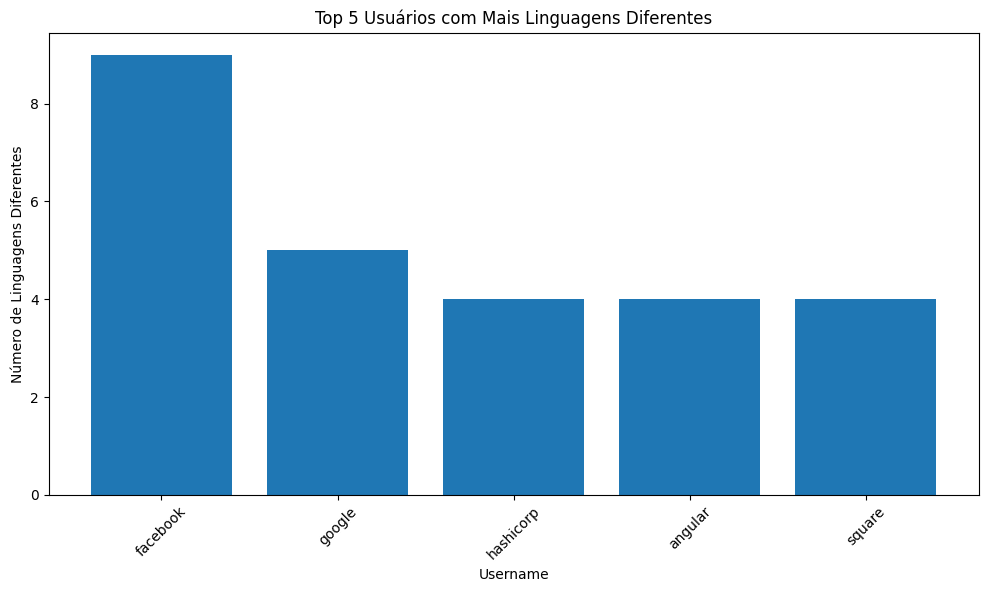

In [23]:
# Agrupar e contar as linguagens por usuário
user_language_counts = git_df.groupby(['Username', 'Language']).size().reset_index(name='Count')

user_language_counts = user_language_counts.sort_values(by='Count', ascending=False)

top_5_languages = user_language_counts.head(8)

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_5_languages['Username'], top_5_languages['Count'])
plt.xlabel('Username')
plt.ylabel('Número de Linguagens Diferentes')
plt.title('Top 5 Usuários com Mais Linguagens Diferentes')
plt.xticks(rotation=45)
plt.show()


# **Terceiro Insight**

In [19]:
# Calcular o IQR (Interquartile Range) para as estrelas
Q1 = git_df['Number of Stars'].quantile(0.25)
Q3 = git_df['Number of Stars'].quantile(0.75)
IQR = Q3 - Q1

threshold = Q3 + 1.5 * IQR

outliers = git_df[git_df['Number of Stars'] > threshold]

print("Número de outliers encontrados:", len(outliers))
print("Repositórios que se destacam em termos de número de estrelas, mas que não se encaixam nas tendências gerais:")
print(outliers[['Username', 'Repository Name', 'Number of Stars']])


Número de outliers encontrados: 76
Repositórios que se destacam em termos de número de estrelas, mas que não se encaixam nas tendências gerais:
           Username         Repository Name  Number of Stars
0      freeCodeCamp            freeCodeCamp            290.0
1              twbs               bootstrap            112.0
2   EbookFoundation  free-programming-books             87.8
3          facebook                   react             69.7
4                d3                      d3             65.7
..              ...                     ...              ...
71      chrislgarry               Apollo-11             24.4
72       kubernetes              kubernetes             24.3
73           lodash                  lodash             24.3
74        Alamofire               Alamofire             24.1
75          antirez                   redis             24.0

[76 rows x 3 columns]


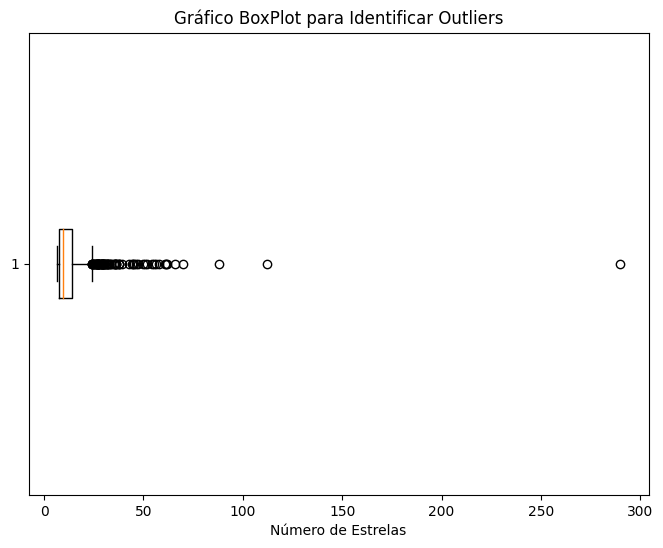

In [20]:
# Gerando um gráfico de caixa para identificar outliers
plt.figure(figsize=(8, 6))
plt.boxplot(git_df['Number of Stars'], vert=False)
plt.xlabel('Número de Estrelas')
plt.title('Gráfico BoxPlot para Identificar Outliers')
plt.show()
